In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv'
data = pd.read_csv(filepath, header=0, index_col=0)
data

,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
Date,,,,,,,,,,,,,,
1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California


## Task1

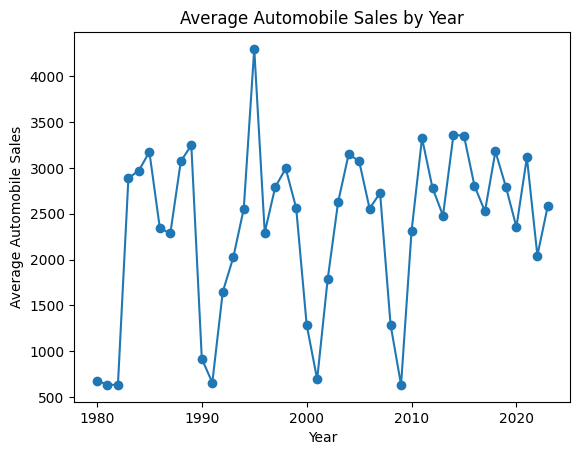

In [8]:
sales_yearly = data.groupby('Year', as_index=False)['Automobile_Sales'].mean()
ax = sales_yearly.set_index('Year')['Automobile_Sales'].plot(kind='line', marker='o')
ax.set_title('Average Automobile Sales by Year')
ax.set_xlabel('Year'); ax.set_ylabel('Average Automobile Sales')
plt.show()

## Task 2

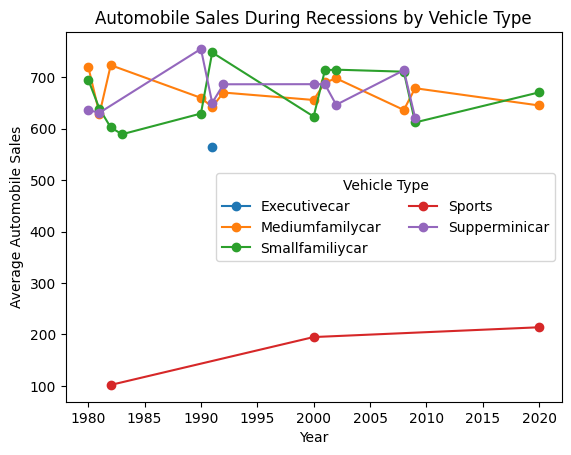

In [9]:
rec = data[data['Recession'] == 1]
rec_year_type = rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

fig, ax = plt.subplots()
for vtype, sub in rec_year_type.groupby('Vehicle_Type'):
    ax.plot(sub['Year'], sub['Automobile_Sales'], marker='o', label=vtype)
ax.set_title('Automobile Sales During Recessions by Vehicle Type')
ax.set_xlabel('Year'); ax.set_ylabel('Average Automobile Sales')
ax.legend(title='Vehicle Type', ncols=2)
plt.show()

## Task 3

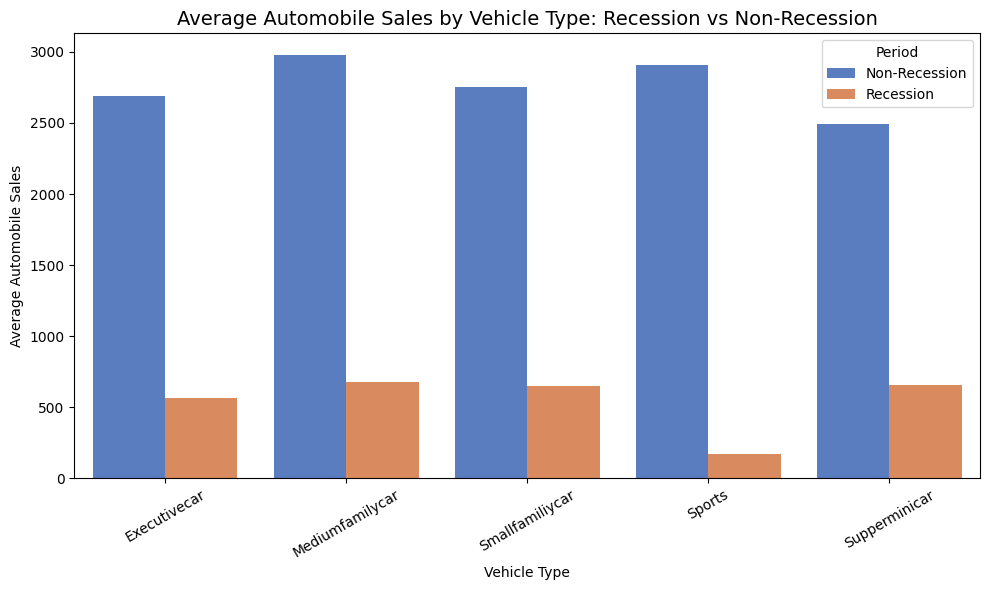

In [ ]:
data['Period'] = np.where(data['Recession'] == 1, 'Recession', 'Non-Recession')
sales_comparison = (
    data.groupby(['Period', 'Vehicle_Type'], as_index=False)['Automobile_Sales']
    .mean()
)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=sales_comparison,
    x='Vehicle_Type',
    y='Automobile_Sales',
    hue='Period',
    palette='muted'
)
plt.title('Average Automobile Sales by Vehicle Type: Recession vs Non-Recession', fontsize=14)
plt.xlabel('Vehicle Type')
plt.ylabel('Average Automobile Sales')
plt.xticks(rotation=30)
plt.legend(title='Period')
plt.tight_layout()
plt.show()

## Task 4

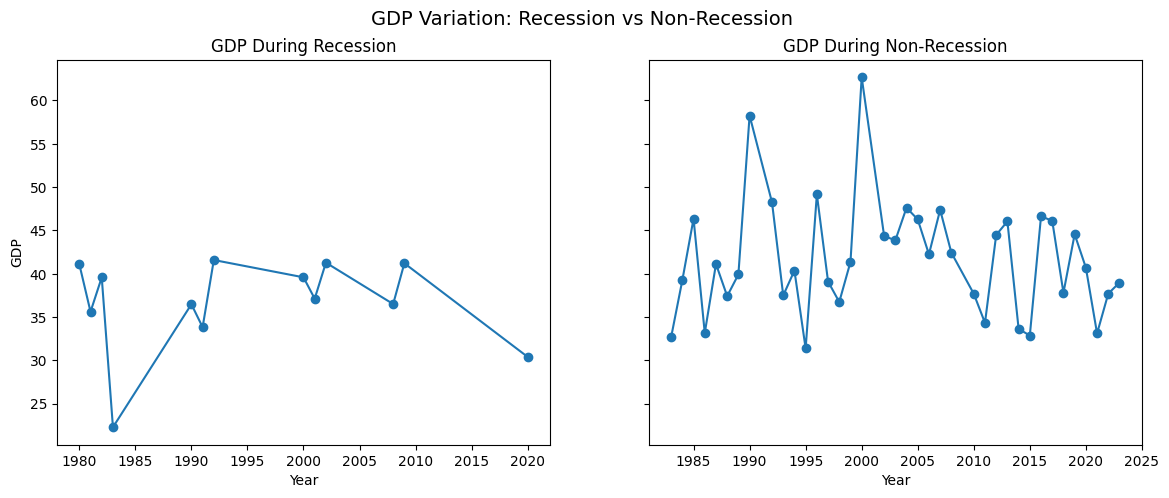

In [11]:
gdp_rec = data[data['Recession'] == 1].groupby('Year', as_index=False)['GDP'].mean()
gdp_non = data[data['Recession'] == 0].groupby('Year', as_index=False)['GDP'].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
axes[0].plot(gdp_rec['Year'], gdp_rec['GDP'], marker='o')
axes[0].set_title('GDP During Recession')
axes[0].set_xlabel('Year'); axes[0].set_ylabel('GDP')

axes[1].plot(gdp_non['Year'], gdp_non['GDP'], marker='o')
axes[1].set_title('GDP During Non-Recession')
axes[1].set_xlabel('Year')

fig.suptitle('GDP Variation: Recession vs Non-Recession', fontsize=14)
plt.show()

## Task 5

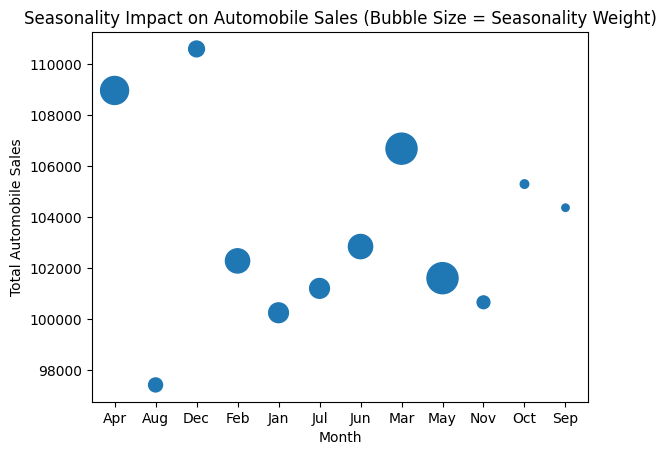

In [12]:
season = data.groupby('Month', as_index=False).agg(
    Automobile_Sales=('Automobile_Sales', 'sum'),
    Seasonality_Weight=('Seasonality_Weight', 'mean')
)
sizes = 500 * (season['Seasonality_Weight'] / season['Seasonality_Weight'].max())
fig, ax = plt.subplots()
scatter = ax.scatter(season['Month'], season['Automobile_Sales'], s=sizes)
ax.set_title('Seasonality Impact on Automobile Sales (Bubble Size = Seasonality Weight)')
ax.set_xlabel('Month'); ax.set_ylabel('Total Automobile Sales')
plt.show()

## Task 6

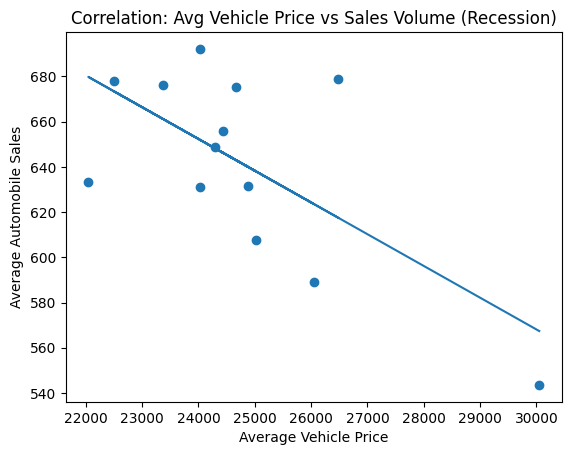

In [14]:
rec_price_sales = rec.groupby('Year', as_index=False).agg(
    Avg_Price=('Price', 'mean'),
    Avg_Sales=('Automobile_Sales', 'mean')
)
fig, ax = plt.subplots()
ax.scatter(rec_price_sales['Avg_Price'], rec_price_sales['Avg_Sales'])
ax.set_title('Correlation: Avg Vehicle Price vs Sales Volume (Recession)')
ax.set_xlabel('Average Vehicle Price')
ax.set_ylabel('Average Automobile Sales')

m, b = np.polyfit(rec_price_sales['Avg_Price'], rec_price_sales['Avg_Sales'], 1)
ax.plot(rec_price_sales['Avg_Price'], m*rec_price_sales['Avg_Price'] + b)
plt.show()

## Task 7

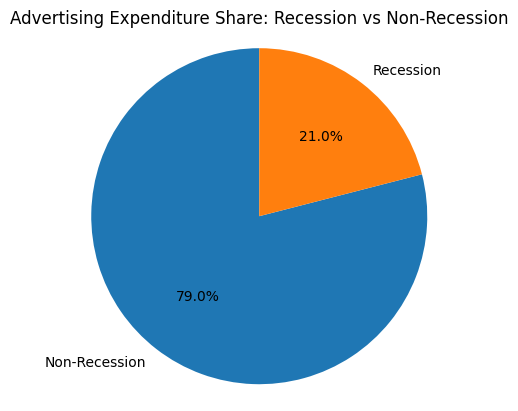

In [15]:
ad_share = data.groupby('Recession', as_index=False)['Advertising_Expenditure'].sum()
labels = ad_share['Recession'].map({1: 'Recession', 0: 'Non-Recession'})
fig, ax = plt.subplots()
ax.pie(ad_share['Advertising_Expenditure'], labels=labels, autopct='%1.1f%%', startangle=90)
ax.set_title('Advertising Expenditure Share: Recession vs Non-Recession')
ax.axis('equal')
plt.show()

## Task 8

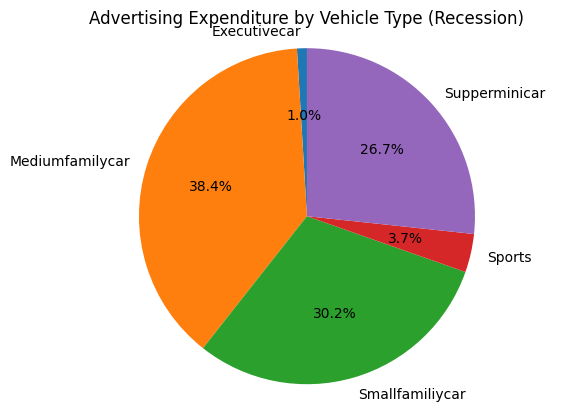

In [16]:
ad_by_type_rec = rec.groupby('Vehicle_Type', as_index=False)['Advertising_Expenditure'].sum()
fig, ax = plt.subplots()
ax.pie(ad_by_type_rec['Advertising_Expenditure'], labels=ad_by_type_rec['Vehicle_Type'], autopct='%1.1f%%', startangle=90)
ax.set_title('Advertising Expenditure by Vehicle Type (Recession)')
ax.axis('equal')
plt.show()

## Task 9

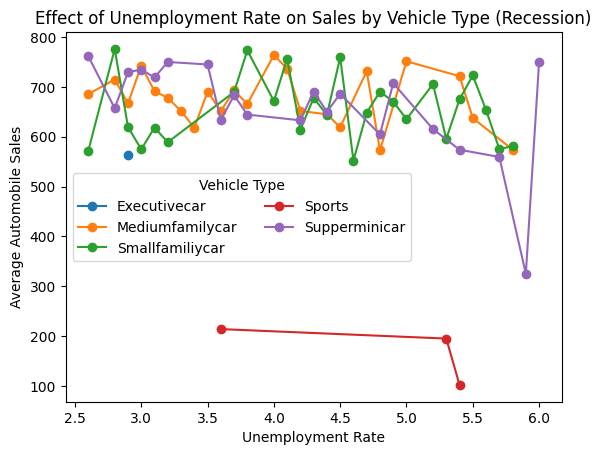

In [17]:
unemp_trend = rec.groupby(['unemployment_rate', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
fig, ax = plt.subplots()
for vtype, sub in unemp_trend.groupby('Vehicle_Type'):
    ax.plot(sub['unemployment_rate'], sub['Automobile_Sales'], marker='o', label=vtype)
ax.set_title('Effect of Unemployment Rate on Sales by Vehicle Type (Recession)')
ax.set_xlabel('Unemployment Rate'); ax.set_ylabel('Average Automobile Sales')
ax.legend(title='Vehicle Type', ncols=2)
plt.show()